In [30]:
import os
import sys
from  dotenv import load_dotenv
import psycopg2
import pandas as pd 
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
load_dotenv()
user = os.environ['user']
password = os.environ['password']
host = os.environ['host']
port = os.environ['port']
database = os.environ['database']

In [5]:
def connect():
    conn = None
    try:
        print('Connecting...')
        conn = psycopg2.connect(
            host = host,
            database = database,
            user = user,
            password = password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)

    print("All good, Connection successfull!")
    return conn

In [6]:
def sql_dataFrame(conn, query):
    cursor = conn.cursor()
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    tuples_list = cursor.fetchall()

    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()
    return df


In [7]:
query = """ SELECT * FROM public.xdr_data"""

conn = connect()

df = sql_dataFrame(conn, query)

conn.close()

Connecting...
All good, Connection successfull!


In [8]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

Exploratory Data Analaysis

In [9]:
df.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count            150000.000000  ...        1.500010e+05        1.500010e+05   
mean              13300.045927  ...        1.163407e+07        1.100941e+07   
std               23971.878541  ...        6.710569e+06        6.345423e+06   
min                   0.000000  ...        5.300000e+01        1.050000e+02   
25%                  43.000000  ...        5.833501e+06        5.517965e+06   
50%                  63.000000  ...        1.161602e+07        1.101345e+07   
75%               19710.750000  ...        1.744852e+07        1.651556e+07   
max              378160.000000  ...        2.325910e+07        2.201196e+07   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       4.220447e+08   
std          6.725218e+06        6.359490e+06       2.439675e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.777156e+06        5.475981e+06       2.104733e+08   
50%          1.164222e+07        1.099638e+07       4.234081e+08   
75%          1.747048e+07        1.650727e+07       6.331742e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.500010e+05      1.500010e+05      1.500010e+05   
mean        8.288398e+06      4.211005e+08      8.264799e+06   
std         4.782700e+06      2.432050e+08      4.769004e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.128476e+06      2.101869e+08      4.145943e+06   
50%         8.291208e+06      4.218030e+08      8.267071e+06   
75%         1.243162e+07      6.316918e+08      1.238415e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500000e+05      1.500000e+05  
mean       4.112121e+07      4.546434e+08  
std        1.127639e+07      2.441429e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322201e+07      2.431068e+08  
50%        4.114331e+07      4.558411e+08  
75%        4.903424e+07      6.657055e+08  
max        7.833131e+07      9.029696e+08  

[8 rows x 50 columns]

In [10]:
df.count()

Bearer Id                                   149010
Start                                       150000
Start ms                                    150000
End                                         150000
End ms                                      150000
Dur. (ms)                                   150000
IMSI                                        149431
MSISDN/Number                               148935
IMEI                                        149429
Last Location Name                          148848
Avg RTT DL (ms)                             122172
Avg RTT UL (ms)                             122189
Avg Bearer TP DL (kbps)                     150000
Avg Bearer TP UL (kbps)                     150000
TCP DL Retrans. Vol (Bytes)                  61855
TCP UL Retrans. Vol (Bytes)                  53352
DL TP < 50 Kbps (%)                         149247
50 Kbps < DL TP < 250 Kbps (%)              149247
250 Kbps < DL TP < 1 Mbps (%)               149247
DL TP > 1 Mbps (%)             

In [11]:
df['Total'] = df.apply(lambda x: x['Total UL (Bytes)'] + x['Total DL (Bytes)'], axis=1)


In [12]:
print(df['Total'])

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
150000            NaN
Name: Total, Length: 150001, dtype: float64


In [13]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [14]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 56 columns.
There are 42 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [43]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [45]:
# Data cleaning
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)',
                   'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean.shape

(150001, 47)

In [46]:
df_clean.isnull().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [15]:
def convert_bytes_to_megabytes(df, bytes_data):
    megabyte = 1 * 10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

In [16]:
df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [17]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(), df[column])
    return df[column]

In [18]:
def remove_outliers(df, column_to_process, z_threshold=3):
    # Apply outlier removal to the specified column
    z_scores = zscore(df[column_to_process])
    outlier_column = column_to_process + '_Outlier'
    df[outlier_column] = (np.abs(z_scores) > z_threshold).astype(int)
    df = df[df[outlier_column] == 0]  # Keep rows without outliers

    # Drop the outlier column as it's no longer needed
    df = df.drop(columns=[outlier_column], errors='ignore')

    return df

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [41]:
df.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count            150000.000000  ...        1.500010e+05        1.500010e+05   
mean              13300.045927  ...        1.162685e+07        1.100175e+07   
std               23971.878541  ...        6.725218e+06        6.359490e+06   
min                   0.000000  ...        4.200000e+01        3.500000e+01   
25%                  43.000000  ...        5.777156e+06        5.475981e+06   
50%                  63.000000  ...        1.164222e+07        1.099638e+07   
75%               19710.750000  ...        1.747048e+07        1.650727e+07   
max              378160.000000  ...        2.325919e+07        2.201196e+07   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count       1.500010e+05       1.500010e+05      1.500010e+05   
mean        4.220447e+08       8.288398e+06      4.211005e+08   
std         2.439675e+08       4.782700e+06      2.432050e+08   
min         2.516000e+03       5.900000e+01      3.290000e+03   
25%         2.104733e+08       4.128476e+06      2.101869e+08   
50%         4.234081e+08       8.291208e+06      4.218030e+08   
75%         6.331742e+08       1.243162e+07      6.316918e+08   
max         8.434419e+08       1.655879e+07      8.434425e+08   

       Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)         Total  \
count      1.500010e+05      1.500000e+05      1.500000e+05  1.500000e+05   
mean       8.264799e+06      4.112121e+07      4.546434e+08  4.957646e+08   
std        4.769004e+06      1.127639e+07      2.441429e+08  2.443818e+08   
min        1.480000e+02      2.866892e+06      7.114041e+06  2.895611e+07   
25%        4.145943e+06      3.322201e+07      2.431068e+08  2.844759e+08   
50%        8.267071e+06      4.114331e+07      4.558411e+08  4.968611e+08   
75%        1.238415e+07      4.903424e+07      6.657055e+08  7.065059e+08   
max        1.655882e+07      7.833131e+07      9.029696e+08  9.559848e+08   

                  x  
count  68527.000000  
mean     114.471024  
std      963.194564  
min        0.000040  
25%        0.112404  
50%        1.941949  
75%       25.042904  
max    72530.636168  

[8 rows x 52 columns]

In [42]:
df.nunique()

Bearer Id                                   134708
Start                                         9997
Start ms                                      1000
End                                           6403
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

Univariate Data analaysis

In [22]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0  9.16456699548519E+015  ...           8198936.0           9656251.0   
1                L77566A  ...          18338413.0          17227132.0   
2                D42335A  ...          17587794.0           6163408.0   
3                T21824A  ...          13994646.0           1097942.0   
4                D88865A  ...          17124581.0            415218.0   

   Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0        278082303.0         14344150.0       171744450.0         8814393.0   
1        608750074.0          1170709.0       526904238.0        15055145.0   
2        229584621.0           395630.0       410692588.0         4215763.0   
3        799538153.0         10849722.0       749039933.0        12797283.0   
4        527707248.0          3529801.0       550709500.0        13910322.0   

   Total UL (Bytes)  Total DL (Bytes)        Total   x  
0        36749741.0       308879636.0  345629377.0 NaN  
1        53800391.0       653384965.0  707185356.0 NaN  
2        27883638.0       279807335.0  307690973.0 NaN  
3        43324218.0       846028530.0  889352748.0 NaN  
4        38542814.0       569138589.0  607681403.0 NaN  

[5 rows x 57 columns]

In [65]:
df['Start ms'].value_counts()

Start ms
341.0    190
624.0    183
109.0    182
379.0    180
248.0    180
        ... 
582.0    121
431.0    121
446.0    117
665.0    117
917.0    117
Name: count, Length: 1000, dtype: int64

In [47]:
top_10 = df['Handset Type'].value_counts().nlargest(10)
top_10 = pd.DataFrame(top_10)
top_10

count
Handset Type                       
Huawei B528S-23A              19752
Apple iPhone 6S (A1688)        9419
Apple iPhone 6 (A1586)         9023
undefined                      8987
Apple iPhone 7 (A1778)         6326
Apple iPhone Se (A1723)        5187
Apple iPhone 8 (A1905)         4993
Apple iPhone Xr (A2105)        4568
Samsung Galaxy S8 (Sm-G950F)   4520
Apple iPhone X (A1901)         3813

In [48]:
topManufucturers = df['Handset Manufacturer'].value_counts().nlargest(3)
topManufucturers = pd.DataFrame(topManufucturers)
topManufucturers

count
Handset Manufacturer       
Apple                 59565
Samsung               40839
Huawei                34423

In [49]:
top_handset_manufacturer = df[df['Handset Manufacturer'].isin(topManufucturers.index)]

top5_handset_manufacturer = top_handset_manufacturer.groupby('Handset Manufacturer') ['Handset Type'].value_counts().nlargest(5)

top5_handset_manufacturer

Handset Manufacturer  Handset Type           
Huawei                Huawei B528S-23A           19752
Apple                 Apple iPhone 6S (A1688)     9419
                      Apple iPhone 6 (A1586)      9023
                      Apple iPhone 7 (A1778)      6326
                      Apple iPhone Se (A1723)     5187
Name: count, dtype: int64

In [50]:
xDr_sessions = df["Bearer Id"].value_counts().nlargest()
xDr_sessions = pd.DataFrame(xDr_sessions)
xDr_sessions

count
Bearer Id          
1.304243e+19     16
1.304243e+19     10
1.304243e+19      9
1.304243e+19      9
1.304243e+19      9

In [51]:
Total_xdr = df["Dur. (ms)"].value_counts().nlargest()
Total_xdr = pd.DataFrame(Total_xdr)
Total_xdr

count
Dur. (ms)       
86399.0    21413
86400.0     6437
85499.0      188
86398.0      145
86397.0      110

In [52]:
total_dl_ul = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
len(total_dl_ul)

150001

In [53]:
session = df['Other DL (Bytes)'] +  df['Other UL (Bytes)']
print("Total Data volume this session",session)

Total Data volume this session 0         1.805588e+08
1         5.419594e+08
2         4.149084e+08
3         7.618372e+08
4         5.646198e+08
              ...     
149996    1.675193e+07
149997    7.146381e+08
149998    1.324156e+08
149999    8.161200e+08
150000    4.293653e+08
Length: 150001, dtype: float64


In [55]:
user_behavior = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',
    'Start ms': 'min',
    'End ms': 'max',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)' : 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

print(user_behavior)

        MSISDN/Number  Dur. (ms)  Start ms  End ms  Total DL (Bytes)  \
0        3.360100e+10          1     138.0   278.0      8.426375e+08   
1        3.360100e+10          1     422.0   385.0      1.207552e+08   
2        3.360100e+10          1      80.0   454.0      5.566597e+08   
3        3.360101e+10          1     158.0   182.0      4.019932e+08   
4        3.360101e+10          2     552.0   875.0      1.363130e+09   
...               ...        ...       ...     ...               ...   
106851   3.379000e+10          1     829.0   517.0      6.879252e+08   
106852   3.379000e+10          1     846.0   505.0      4.445751e+08   
106853   3.197021e+12          1     345.0   670.0      1.948281e+08   
106854   3.370000e+14          1     811.0    12.0      5.396350e+08   
106855   8.823971e+14          1     259.0   459.0      7.869760e+07   

        Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0             36053108.0                2206504.0        

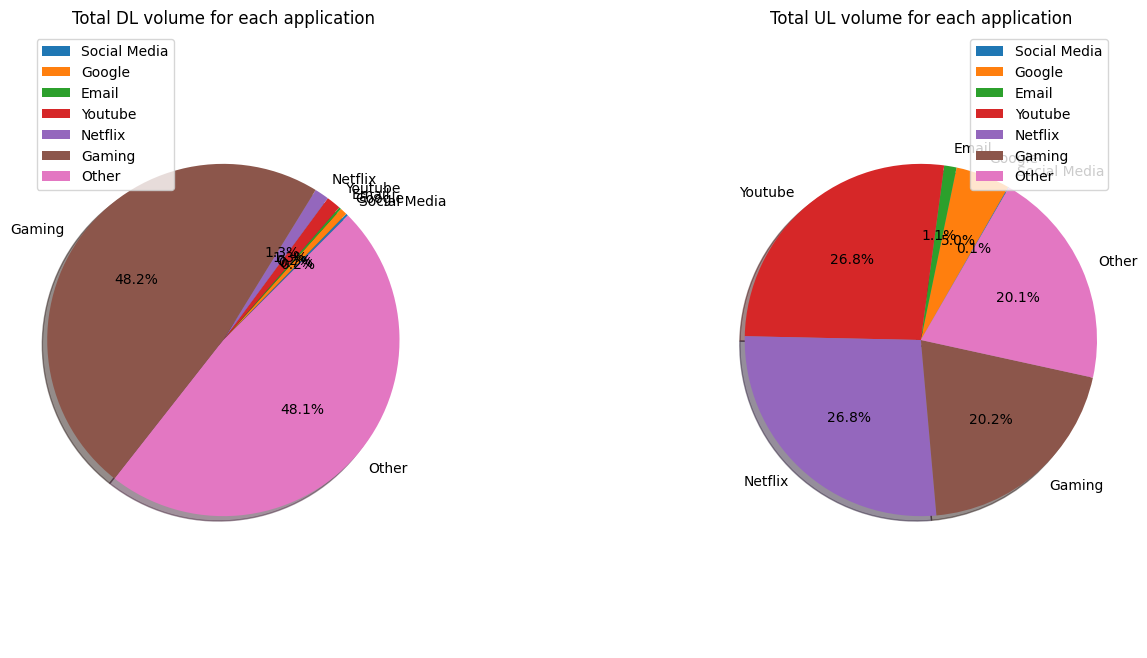

In [56]:
dl_data = [
    user_behavior["Social Media DL (Bytes)"].sum(),
    user_behavior["Google DL (Bytes)"].sum(),
    user_behavior["Email DL (Bytes)"].sum(),
    user_behavior["Youtube DL (Bytes)"].sum(),
    user_behavior["Netflix DL (Bytes)"].sum(),
    user_behavior["Gaming DL (Bytes)"].sum(),
    user_behavior["Other DL (Bytes)"].sum()
]

ul_data = [
    user_behavior["Social Media UL (Bytes)"].sum(),
    user_behavior["Google UL (Bytes)"].sum(),
    user_behavior["Email UL (Bytes)"].sum(),
    user_behavior["Youtube UL (Bytes)"].sum(),
    user_behavior["Netflix UL (Bytes)"].sum(),
    user_behavior["Gaming UL (Bytes)"].sum(),
    user_behavior["Other UL (Bytes)"].sum()
]

labels = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

ax1.pie(dl_data, labels=labels, autopct="%1.1f%%", startangle=45,shadow =True)
ax1.set_title("Total DL volume for each application")

ax2.pie(ul_data, labels=labels, autopct="%1.1f%%", startangle=60,shadow =True)
ax2.set_title("Total UL volume for each application")

ax1.axis("equal")
ax2.axis("equal")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.subplots_adjust(wspace=0.8)

plt.show()

In [66]:
float_columns = ['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

object_columns = ['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

data_float_filled = df[float_columns].fillna(df[float_columns].mean())

data_object_filled = df[object_columns].fillna(df[object_columns].mode().iloc[0])

df = pd.concat([data_float_filled, data_object_filled], axis=1)

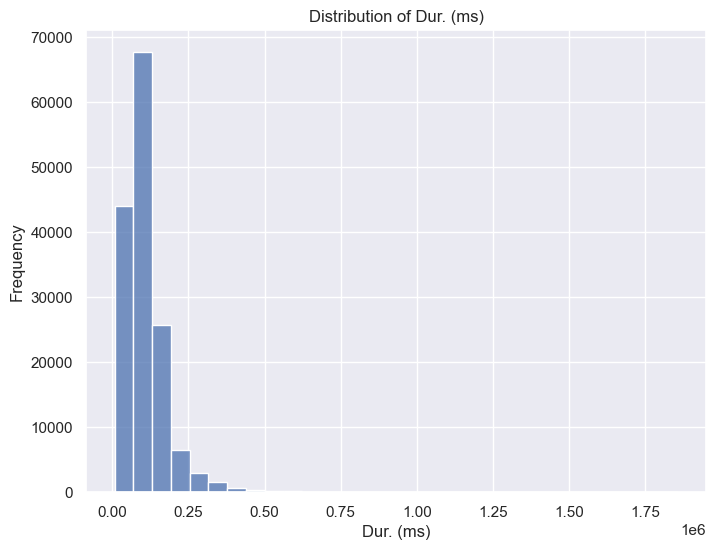

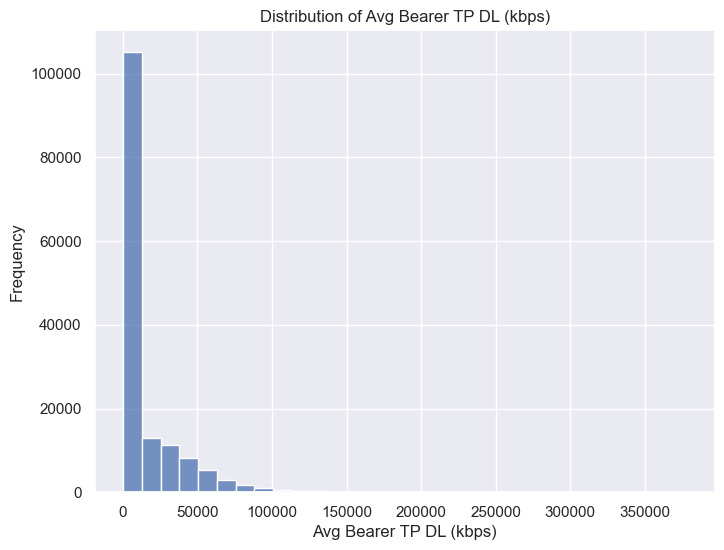

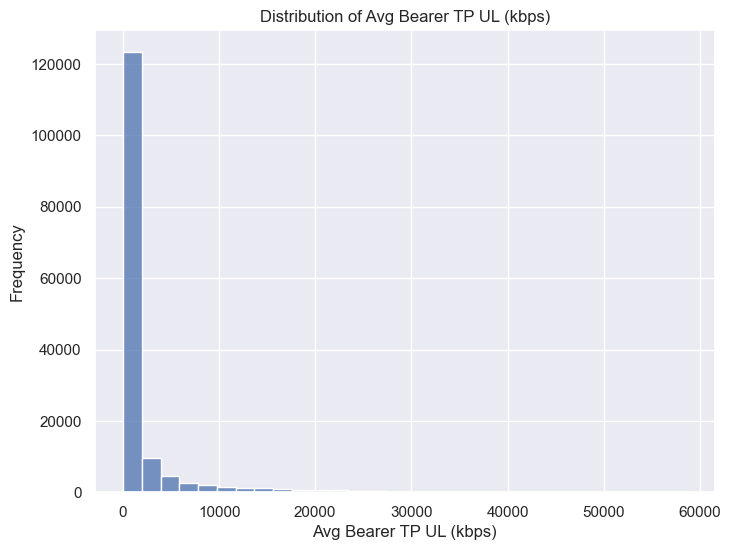

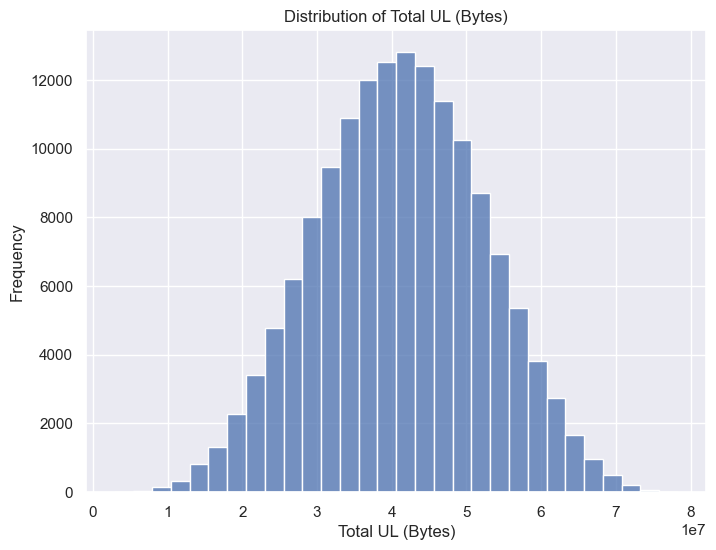

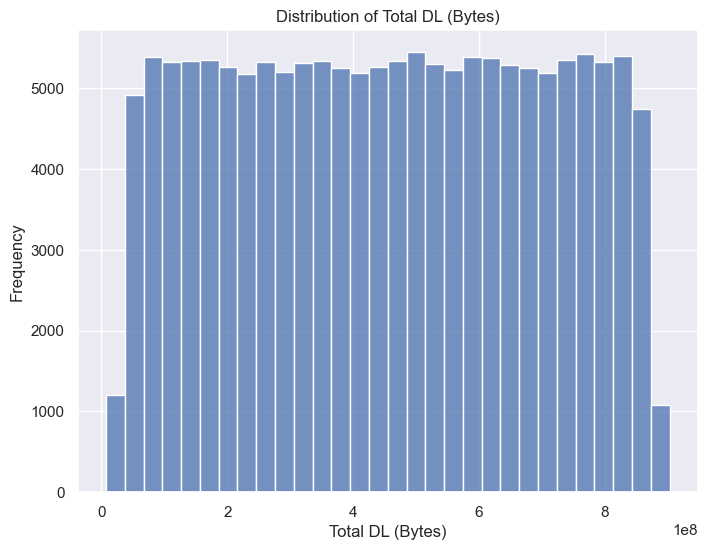

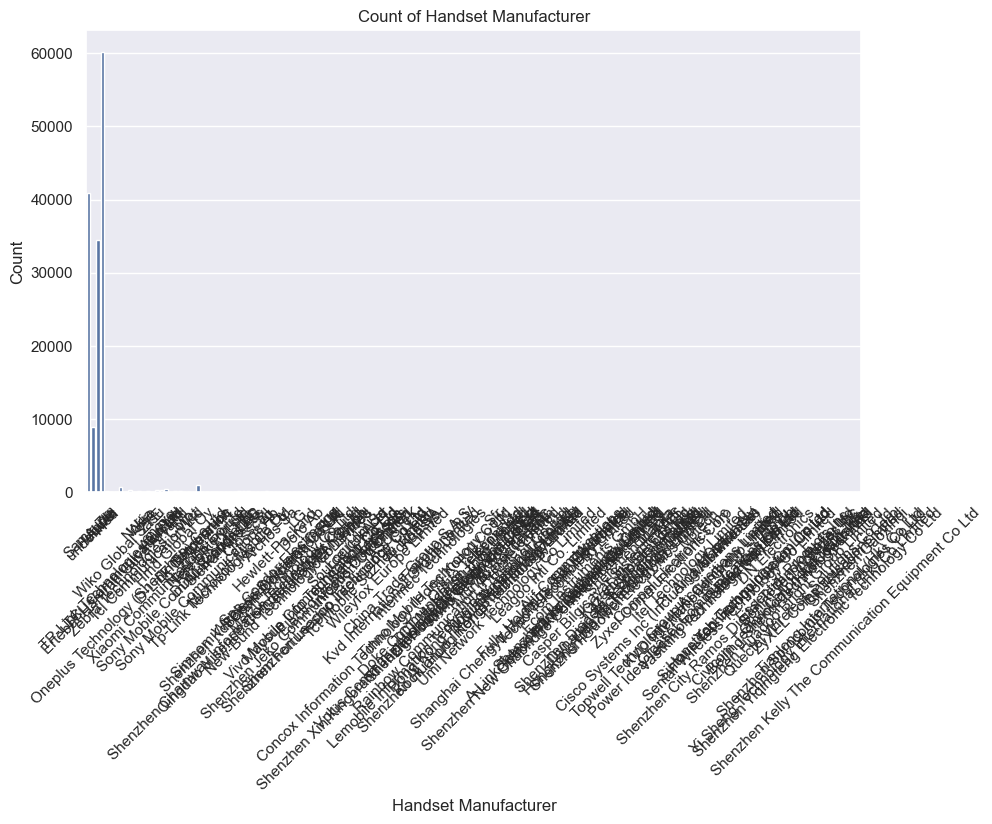

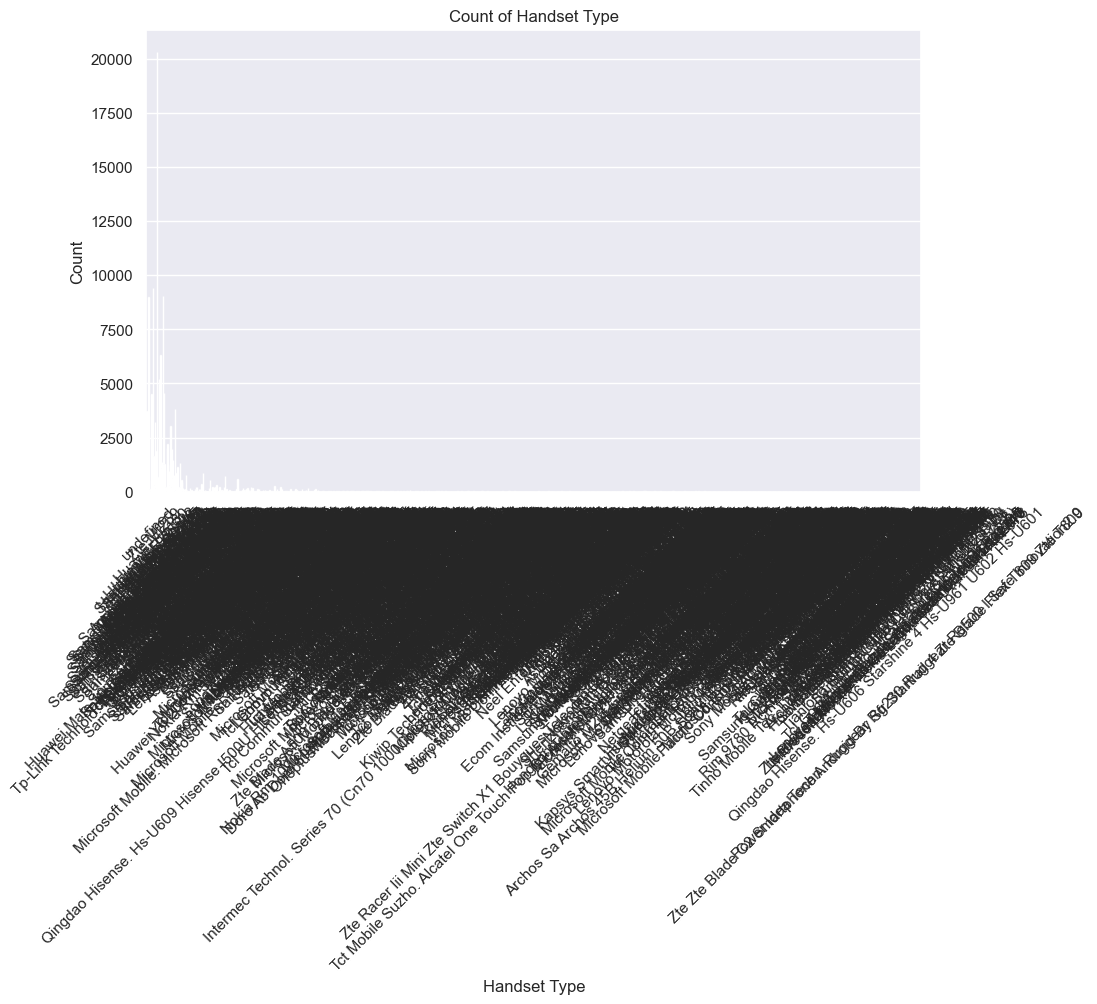

In [69]:
sns.set(style="darkgrid")

numerical_vars = ['Dur. (ms)','Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Total UL (Bytes)','Total DL (Bytes)']
                  
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Categorical variables
categorical_vars = ['Handset Manufacturer', 'Handset Type']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

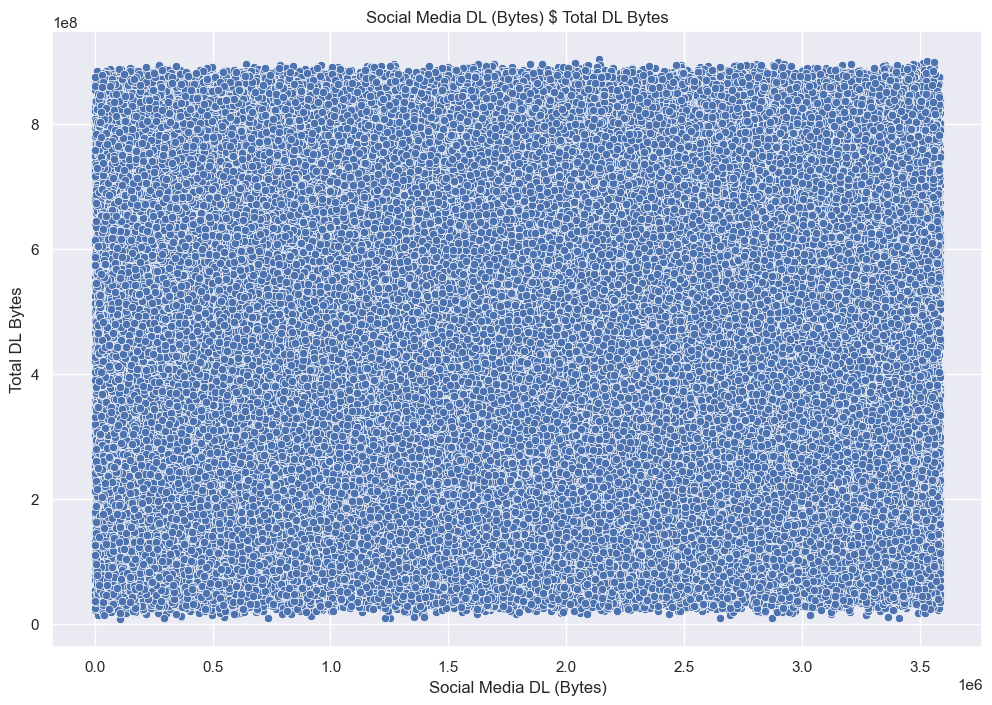

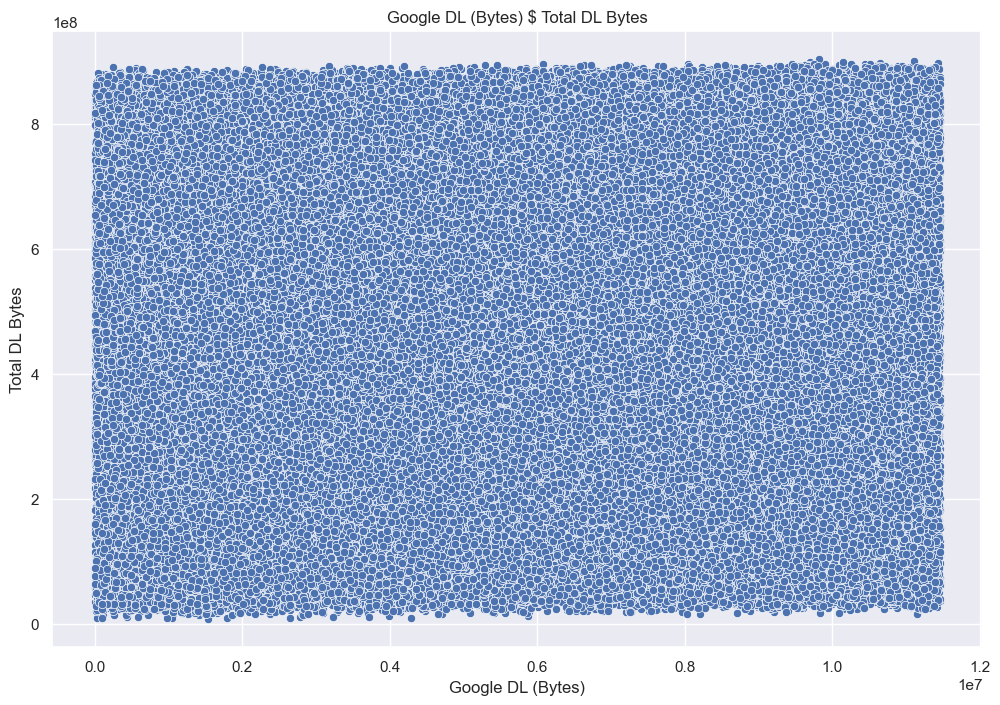

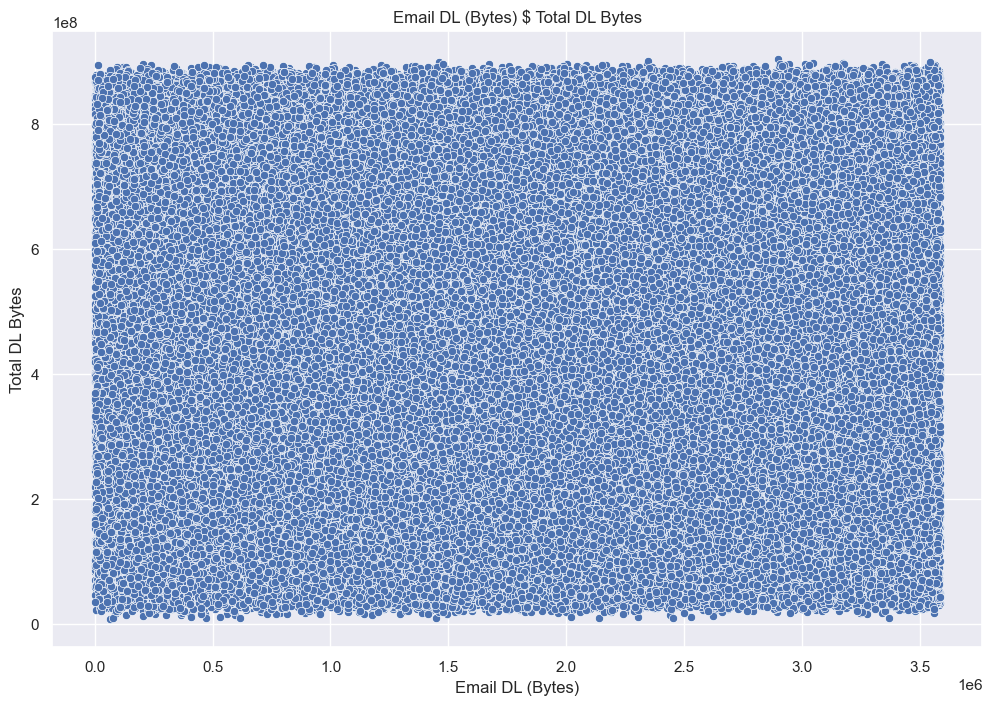

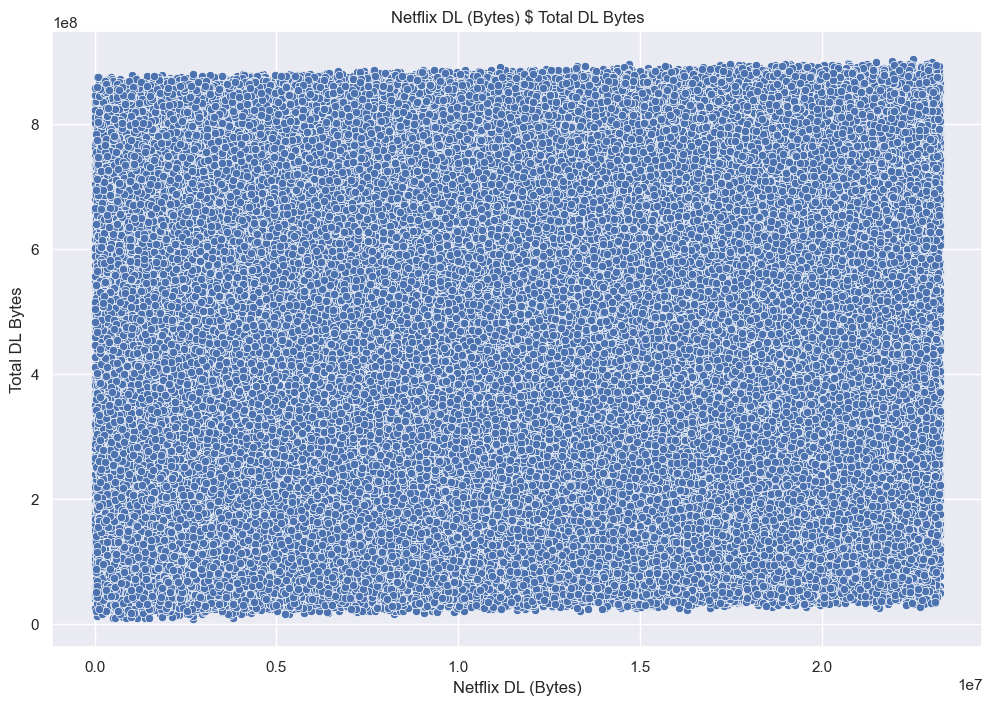

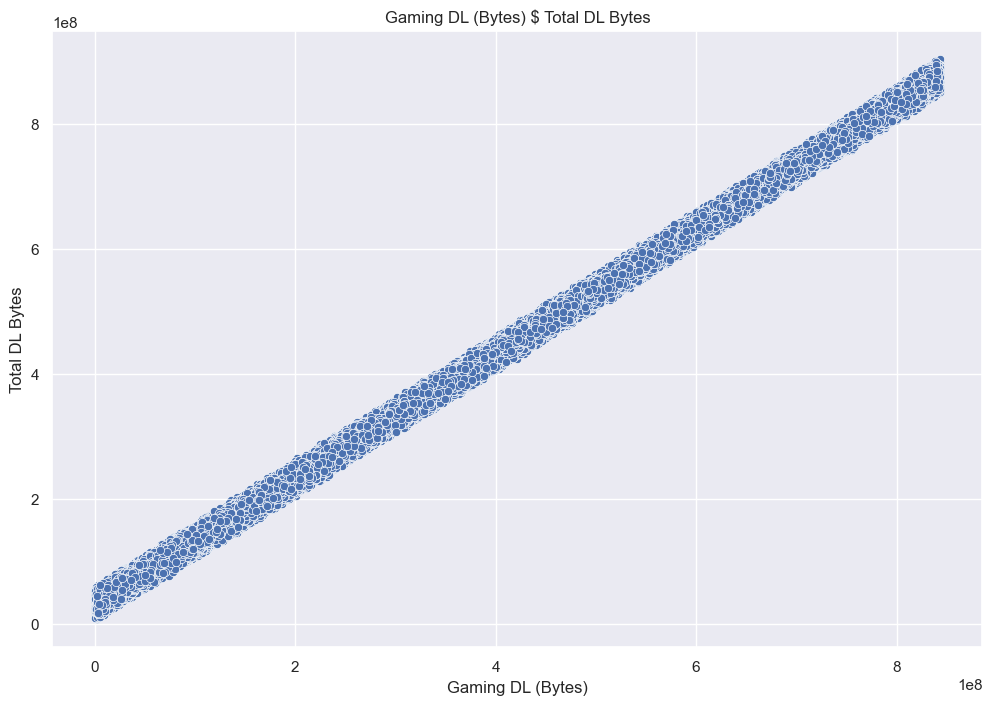

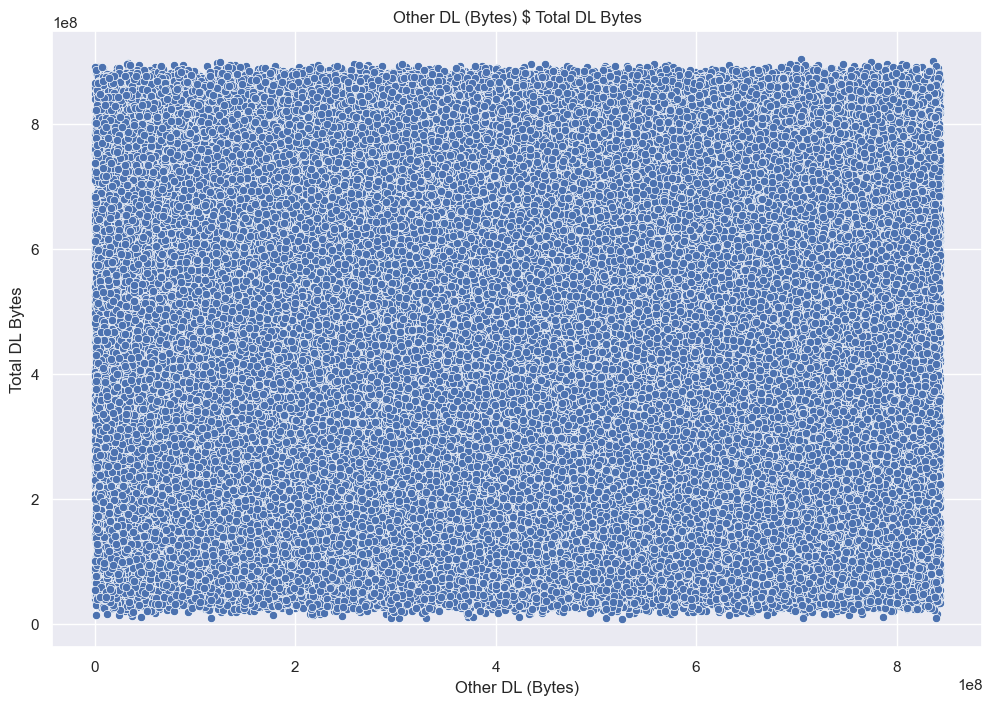

In [70]:
# Bivariate Analysis

vars=['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)',
      'Other DL (Bytes)']

# Scatter plots

for i in vars:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = df,x= i,y ='Total DL (Bytes)')
    plt.title(f'{i} $ Total DL Bytes')
    plt.xlabel(i)
    plt.ylabel("Total DL Bytes")
    plt.show()

In [72]:
total_duration_per_user = df.groupby('Bearer Id')['Dur. (ms).1'].sum().reset_index()
total_duration_per_user['duration_decile'] = pd.qcut(total_duration_per_user['Dur. (ms).1'], 10, labels=False)
user_data_with_deciles = pd.merge(df, total_duration_per_user[['Bearer Id', 'duration_decile']], on='Bearer Id')
data_per_decile = user_data_with_deciles.groupby('duration_decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()
data_per_decile['total_data'] = data_per_decile['Total DL (Bytes)'] + data_per_decile['Total UL (Bytes)']

print(data_per_decile)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
                 Total DL (Bytes)  Total UL (Bytes)    total_data
duration_decile                                                  
0                    6.208639e+12      5.605879e+11  6.769227e+12
1                    6.489353e+12      5.855947e+11  7.074947e+12
2                    6.612917e+12      5.984504e+11  7.211367e+12
3                    6.172484e+12      5.619522e+11  6.734436e+12
4                    6.125091e+12      5.538118e+11  6.678903e+12
5                    6.240589e+12      5.656746e+11  6.806264e+12
6                    6.269538e+12      5.710198e+11  6.840557e+12
7                    6.610696e+12      5.907373e+11  7.201433e+12
8                    8.179434e+12      7.412887e+11  8.920723e+12
9                    9.288229e+12      8.391048e+11  1.012733e+13


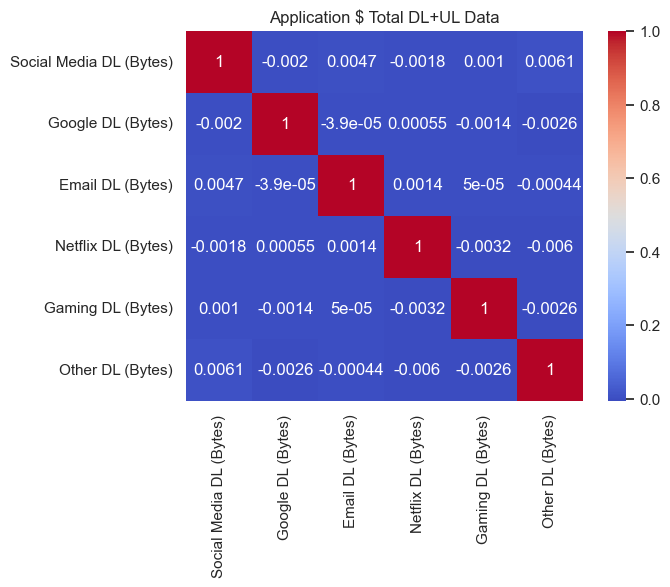

In [73]:
vars=['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)',
      'Other DL (Bytes)']

df = df[vars]
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Application $ Total DL+UL Data")
plt.show()